In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split as TTS
# train_test_split
import math
lr = LinearRegression()
plt.rc('font', size=24)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=24)    # legend fontsize
plt.rc('figure', titlesize=30)  # fontsize of the figure title
def get_errors(y,y_pred):
    print('Mean absolute error: %.2f'% float(mean_absolute_error(y, y_pred)))
    MSE = mean_squared_error(y, y_pred)
    print('Mean squared error: %.2f'% MSE)
    print('Root Mean squared error: %.2f'% math.sqrt(MSE))
    print('Coefficient of determination: %.2f'% float(r2_score(y,y_pred)*100 ) + "%")

# Sintetico #1

In [4]:
df1  = pd.read_csv("Sintetico.csv",delimiter='\t',header=None)
df1.rename(columns={0:'x1',1:'x2',2:'target'},inplace=True)
X = df1.iloc[:,0].to_numpy().reshape(-1,1)
y = df1.iloc[:,1].to_numpy()
df1.head(3)
# y
# X

,x1,x2,target
0,0.665117,0.619822,0
1,0.389321,0.341135,0
2,0.693654,0.622386,0


# Grafica #1

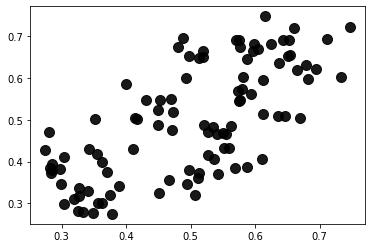

In [5]:
plt.scatter(df1.x1,df1.x2,color="black",s=100,alpha=0.9)

# Regresion lineal

In [6]:
X_train = X[:50]
X_test  = X[50:]
y_train = y[:50]
y_test  = y[50:]
lr.fit(X_train,y_train)
y_pred  = lr.predict(X_test) 
b1      = lr.coef_[0]

# Grafica #2

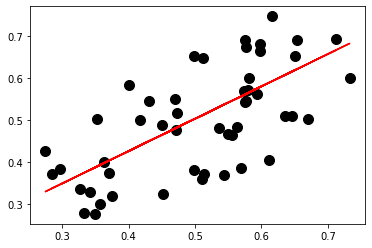

In [7]:
plt.scatter(X_test,y_test,color="black",s=100)
plt.plot(X_test,y_pred,color="red")

## Error absoluto medio

In [8]:
print('Mean absolute error: %.2f'% float(mean_absolute_error(y_test, y_pred)))

Mean absolute error: 0.08


# Error cuadrado medio

In [359]:
MSE = mean_squared_error(y_test, y_pred)
print('Mean squared error: %.2f'% MSE)

Mean squared error: 0.01


# Raiz del error cuadrado medio  

In [360]:
print('Root Mean squared error: %.2f'% math.sqrt(MSE))

Root Mean squared error: 0.10


# Coeficiento de determinacion

In [361]:
print('Coefficient of determination: %.2f'% float(r2_score(y_test,y_pred)*100 ) + "%")

Coefficient of determination: 41.27%


# Grafica #3

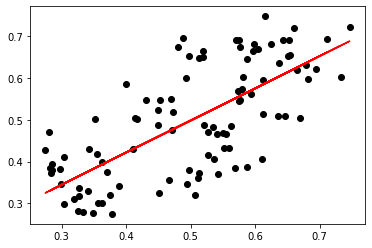

In [362]:
b0 = np.mean(y)-np.mean(X)*b1
plt.scatter(X,y,color="black")
plt.plot(X,b0 + b1*X,color="red")

## Residuals

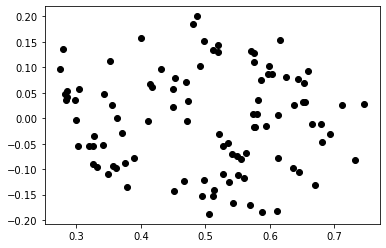

In [368]:
y_pred    = lr.predict(X)
residuals = y-y_pred
plt.scatter(X,residuals,color="black")

# Sintetico 2

In [9]:
lr2 = LinearRegression()
df2 = pd.read_csv("Sintetico2.csv",delimiter="\t",header=None)
df2.rename(columns={0:'x',1:'y'},inplace=True)
df2.drop(columns=[2],inplace=True)
X = df2['x'].to_numpy().reshape(-1,1)
y = df2['y'].to_numpy().reshape(-1,1)

# Grafica #1

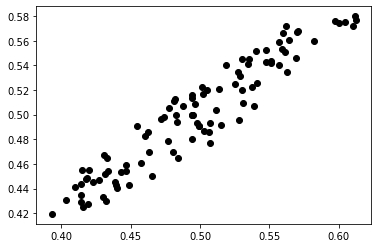

In [10]:
plt.scatter(X,y,color="black")

# Regresion lineal

In [11]:
X_train = X[:50]
X_test  = X[50:]
y_train = y[:50]
y_test  = y[50:]
lr2.fit(X_train,y_train)
y_pred  = lr.predict(X_test) 
b1      = lr.coef_[0]
# b0 = np.mean(y)-np.mean(X)*b1

# Grafica #2

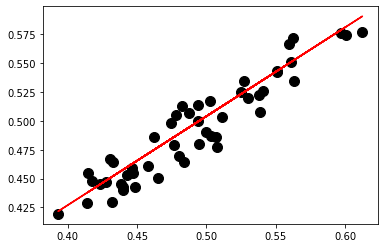

In [394]:
plt.scatter(X_test,y_test,color="black",s=100)
plt.plot(X_test,y_pred,color="red")

# Residuales

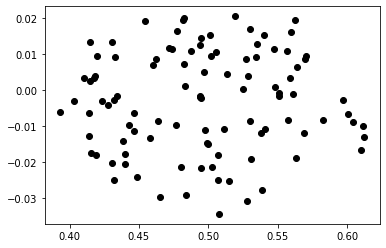

In [12]:
y_pred    = lr2.predict(X)
residuals = y-y_pred
plt.scatter(X,residuals,color="black")

# Data

In [120]:
df = pd.read_csv("data.csv")
df

,x,y
0,0,394.33
1,4,329.50
2,8,291.00
3,12,255.17
4,16,229.33
5,20,204.83
6,24,179.00
7,28,163.83
8,32,150.33


In [121]:
lr3 = LinearRegression()
X       = df['x'].to_numpy().reshape(-1,1)
y       = df['y'].to_numpy().reshape(-1,1)

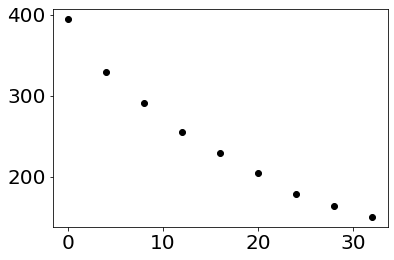

In [122]:
plt.scatter(X,y,color="black")

In [123]:
lr3.fit(X,y)
b1     = lr3.coef_[0][0]
b0     = np.mean(y)-np.mean(X)*b1

In [124]:
y_pred=lr3.predict(X)

In [136]:
get_errors(y,y_pred)

Mean absolute error: 14.09
Mean squared error: 281.28
Root Mean squared error: 16.77
Coefficient of determination: 95.26%


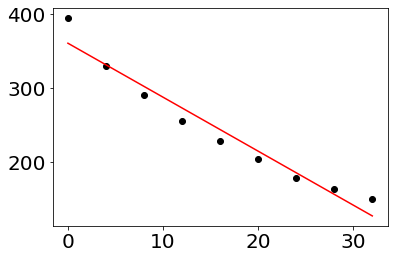

In [126]:
plt.scatter(X,y,color="black")
plt.plot(X,y_pred,color="red")

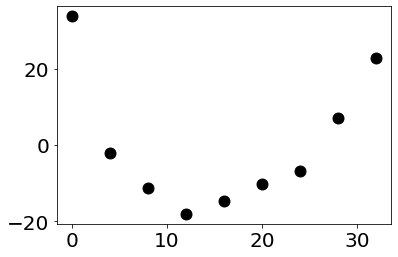

In [127]:
residuals = y-y_pred
plt.scatter(X,residuals,color="black",s=120)

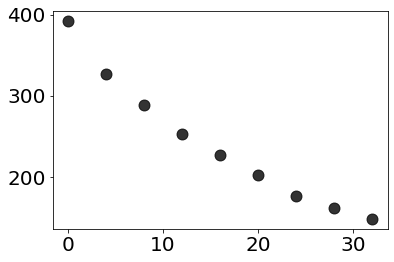

In [128]:
DV    = np.log10(y)
lr3.fit(X,DV)
b1 = lr3.coef_[0][0]
b0     = np.mean(DV)-np.mean(X)*b1
_DV   = np.log10(b0+b1*X)
pred  = np.power(10,_DV)
res   = y - pred
# res
# pred
# DV,pred
# x0 = np.linspace(np.min(X),np.max(X),100)
# y0 = np.zeros(100)
# plt.plot(x0,y0,color="red")
plt.scatter(X,res,color="black",s=120,alpha=0.8)

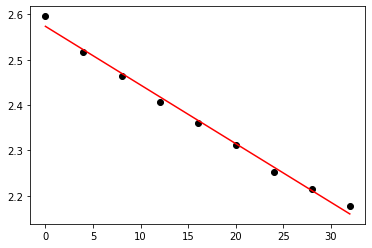

In [69]:
plt.scatter(X,DV,color="black")
plt.plot(X,pred,color="red")

In [147]:
get_errors(DV,pred)

Mean absolute error: 0.31
Mean squared error: 0.13
Root Mean squared error: 0.36
Coefficient of determination: 97.73%


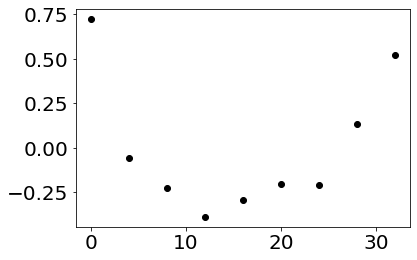

In [130]:
DV   = np.sqrt(y)
lr3.fit(X,DV)
b1 = lr3.coef_[0][0]
b0     = np.mean(DV)-np.mean(X)*b1
_DV  = np.sqrt(b0+b1*X)
pred = np.power(_DV,2)
res  = DV-pred
plt.scatter(X,res,color="black")

In [131]:
get_errors(DV,pred)

Mean absolute error: 0.31
Mean squared error: 0.13
Root Mean squared error: 0.36
Coefficient of determination: 97.73%


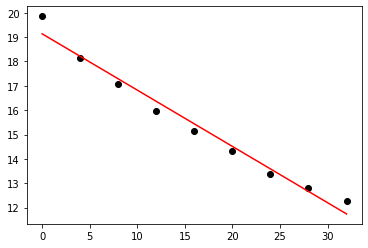

In [47]:
plt.scatter(X,DV,color="black")
plt.plot(X,pred,color="red")

# Wheater

In [4]:
weather_df = pd.read_csv("Weather.csv")
weather_df

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,20602,16469,11.43,29.632,27.222222,22.222222,25.000000,0,NaN,45,...,NaN,NaN,NaN,10.2,NaN,NaN,NaN,NaN,NaN,NaN
1,20602,16470,12.7,59.264,27.777778,22.777778,25.555556,0,NaN,45,...,NaN,NaN,NaN,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2,20602,16471,4.064,50.004,27.777778,22.777778,25.555556,0,NaN,45,...,NaN,NaN,NaN,1.1,NaN,NaN,NaN,NaN,NaN,NaN
3,20602,16472,22.606,40.744,26.666667,23.888889,25.555556,0,NaN,45,...,NaN,NaN,NaN,10.4,NaN,NaN,NaN,NaN,NaN,NaN
4,20602,16473,73.914,51.856,26.111111,23.888889,25.000000,0,NaN,45,...,NaN,NaN,NaN,11.6,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,31401,16590,0,31.484,34.444444,28.888889,31.666667,0,0.0,45,...,NaN,NaN,NaN,11.5,0.0,NaN,NaN,NaN,NaN,NaN
528,31401,16591,T,27.780,35.555556,28.333333,32.222222,0,1000.0,45,...,NaN,NaN,NaN,14.5,1000.0,NaN,NaN,NaN,NaN,NaN
529,31401,16592,2.54,33.336,30.555556,25.555556,28.333333,0,1000.0,45,...,NaN,NaN,NaN,5.5,1000.0,NaN,NaN,NaN,NaN,NaN
530,31401,16593,0,29.632,32.777778,25.555556,29.444444,0,0.0,45,...,NaN,NaN,NaN,9.0,0.0,NaN,NaN,NaN,NaN,NaN


(23.426495556995768,
 -4.096844563288124,
 0.25918962299510984,
 0.004148494717090319)

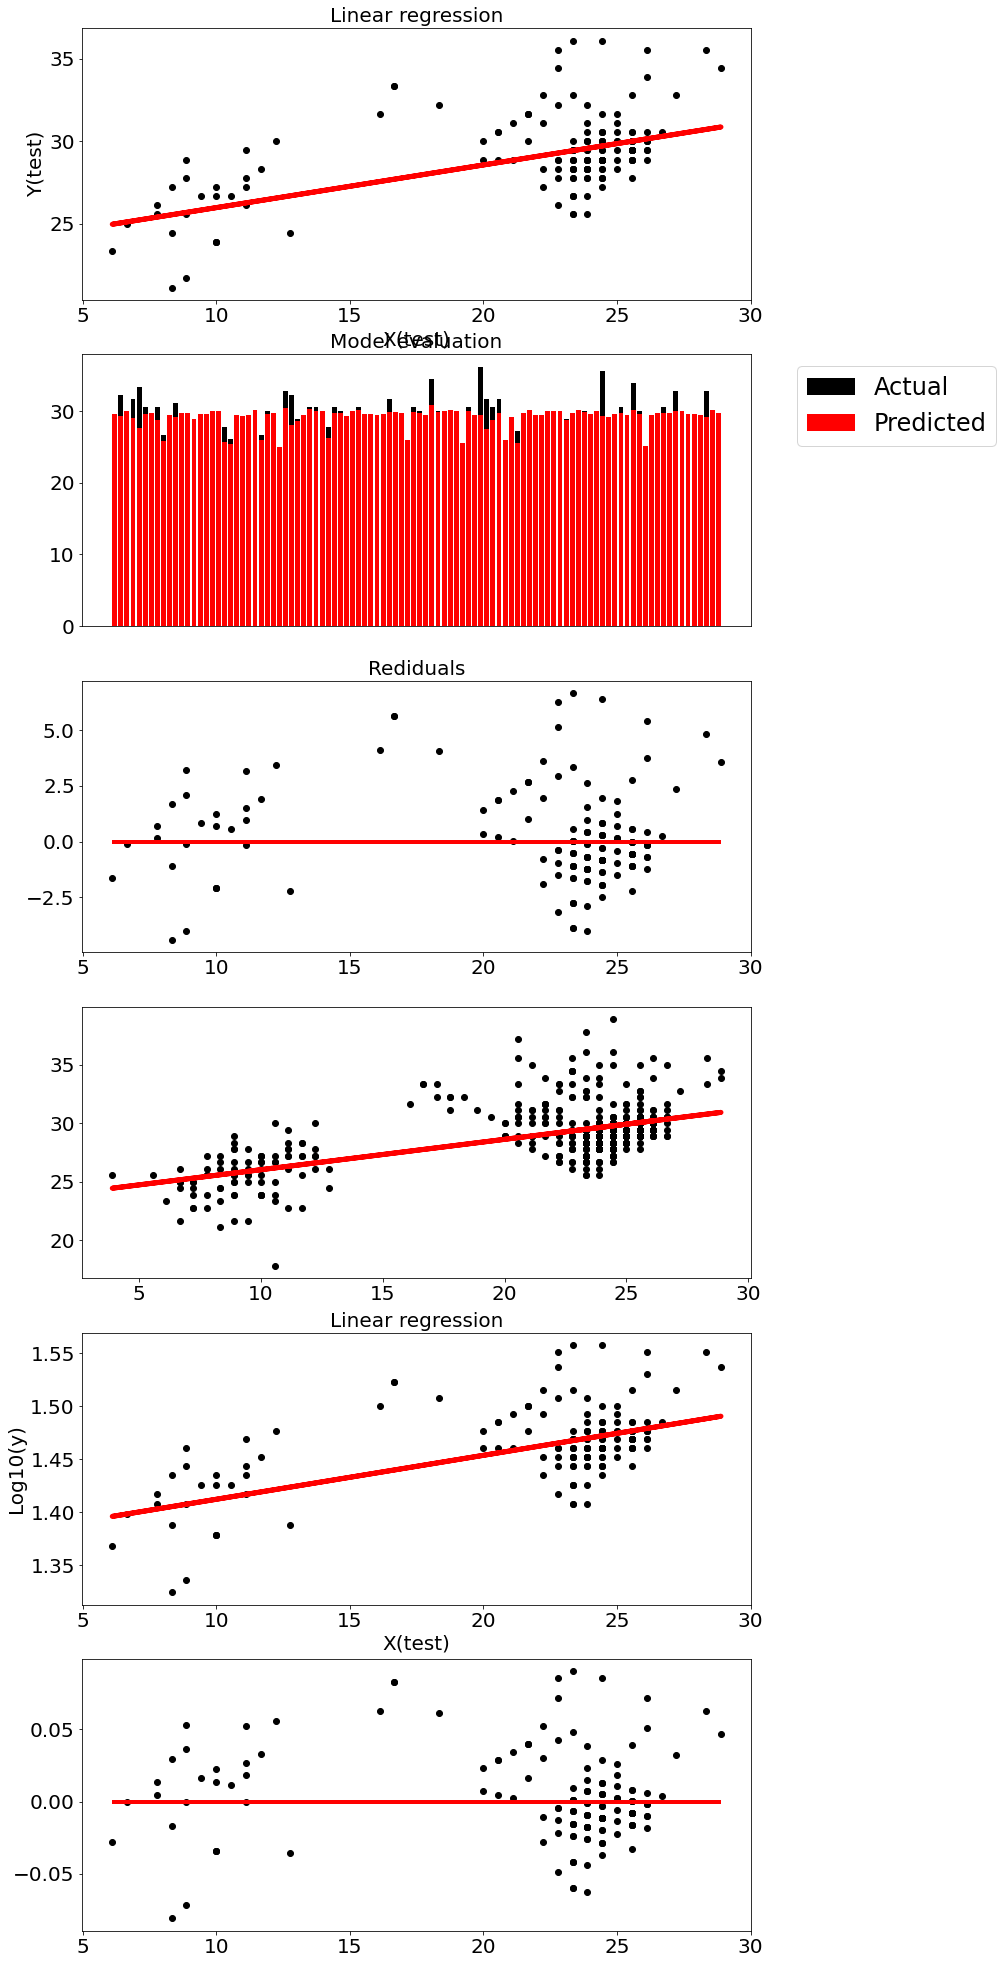

In [164]:
def do_all(x,y):
    lr = LinearRegression()
    x_train, x_test, y_train, y_test = TTS(x,y,test_size=0.30, random_state=42)
    lr.fit(x_train,y_train)
    b1 = lr.coef_[0][0]
    b0     = np.mean(y)-np.mean(x)*b1
#     Preddict
    y_pred = lr.predict(x_test)
#    Plotting 
    _,ax = plt.subplots(6,1,figsize=(12,35))
    ax[0].scatter(x_test,y_test,color="black")
    ax[0].plot(x_test,y_pred,color="red",linewidth=5)
    ax[0].set_xlabel("X(test)")
    ax[0].set_ylabel("Y(test)")
    ax[0].set_title("Linear regression")
#   Plotting(Actual / predicted)
    xs = np.array(range(x_test.shape[0]))
    take = 100
    ax[1].bar(x=xs[:take],height = y_test[:,0][:take],color="black",label="Actual")
    ax[1].bar(x=xs[:take],height = y_pred[:,0][:take],color="red",label="Predicted")
    ax[1].set_xticks([])
    ax[1].set_title("Model evaluation")
    ax[1].legend(bbox_to_anchor=(1.05, 1))
#     ax[1].legend()
#   Plotting (Residuals)
    residuals = y_test[:,0]-y_pred[:,0] 
    ax[2].scatter(x_test,residuals,color="black")
    ax[2].set_title("Rediduals")
    ax[2].hlines(np.zeros(50),np.min(x_test),np.max(x_test),color="red",linewidth=4)
#   Linear regression
    ax[3].scatter(x,y,color="black")
    ax[3].plot(x,b0 + b1*x,color="red",linewidth=5)
#     
    DV         = np.log10(y_train)
    lr.fit(x_train,DV)
    _b1        = lr.coef_[0][0]
    _b0        = np.mean(DV)-np.mean(x_train)*b1
    _y_test    =  np.log10(y_test)
    _y_pred    = lr.predict(x_test)
    _residuals = np.log10(y_test) - _y_pred
    ax[4].scatter(x_test,_y_test,color="black")
    ax[4].plot(x_test,_y_pred,color="red",linewidth=5)
    ax[4].set_xlabel("X(test)")
    ax[4].set_ylabel("Log10(y)")
    ax[4].set_title("Linear regression")
#     
    ax[5].scatter(x_test,_residuals,color="black")
    ax[5].hlines(np.zeros(50),np.min(x_test),np.max(x_test),color="red",linewidth=4)
    return b0,_b0,b1,_b1

    
x = weather_df['MinTemp'].to_numpy().reshape(-1,1)
y = weather_df['MaxTemp'].to_numpy().reshape(-1,1)
do_all(x,y)